# Abalone

Group 18 Members:

- Clara Pichler, 11917694
- Hannah Knapp, 11901857 
- Sibel Toprakkiran, 09426341

### Overview

1. Introduction
- Requirements & Dependencies
- Loading in the Data Sets

2. Preprocessing

3. Classification
- SVM
- Random Forest
- Multilayer Perceptron

4. Analysis of Performance

## Introduction


### Requirements & Dependencies

This project was created using Python 3.12.5 The exact versions of the dependencies can be installed with the following command.

In [29]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


In [100]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import pprint as pp

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from tpot import TPOTClassifier
from time import process_time, time

### Loading in the Data Set

In [31]:
import os
#print(os.listdir("./data"))

In [32]:
# Load the Dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
url='./data/abalone.csv'
column_names = ["Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]
abalone_df = pd.read_csv(url, header=0, names=column_names)

## Preprocessing

In this section we will go over the pre processing of the data set. We take a look at the types of the attributes, outliers, normalisation/standardisation, feature selection and if the data set has missing values and if yes how do we deal with it accordingly. 

In [33]:
display(abalone_df.head(5))
display(abalone_df.info(verbose=True))
display(abalone_df.describe())
display(abalone_df['Rings'].unique())

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


None

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

The minimum value for height is 0, so there are values which are 0 for height in the dataset.

In [34]:
abalone_df[abalone_df.Height == 0]
abalone_df = abalone_df[abalone_df.Height != 0]
display(abalone_df['Height'].describe())

count    4175.000000
mean        0.139583
std         0.041725
min         0.010000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [35]:
# Handling Categorical Data - One Hot Encoding
#abalone_encoded = pd.get_dummies(abalone_df, columns=['Sex'], drop_first=False)
#abalone_encoded.head()
def encode_sex(df):
    df = df.replace("I", 0).replace("F", 1).replace("M", 2)
    df['Sex'] = df['Sex'].astype(int)
    return df

In [36]:
abalone_encoded = encode_sex(abalone_df)
display(abalone_encoded.head())

C:\Users\a428977\AppData\Local\Temp\ipykernel_16264\3826663000.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("I", 0).replace("F", 1).replace("M", 2)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [37]:
#plotting a pair plot to check
#plt.figure(2, figsize = (12, 10))
#sns.pairplot(abalone_encoded)

The correlations can be done only on numerical colums. Below is the correlation matrix

In [38]:
numeric_features = abalone_encoded.select_dtypes(include=[np.number]).columns.tolist()
x = abalone_encoded[numeric_features].corr() 
correlation_matrix = abalone_encoded.corr() 

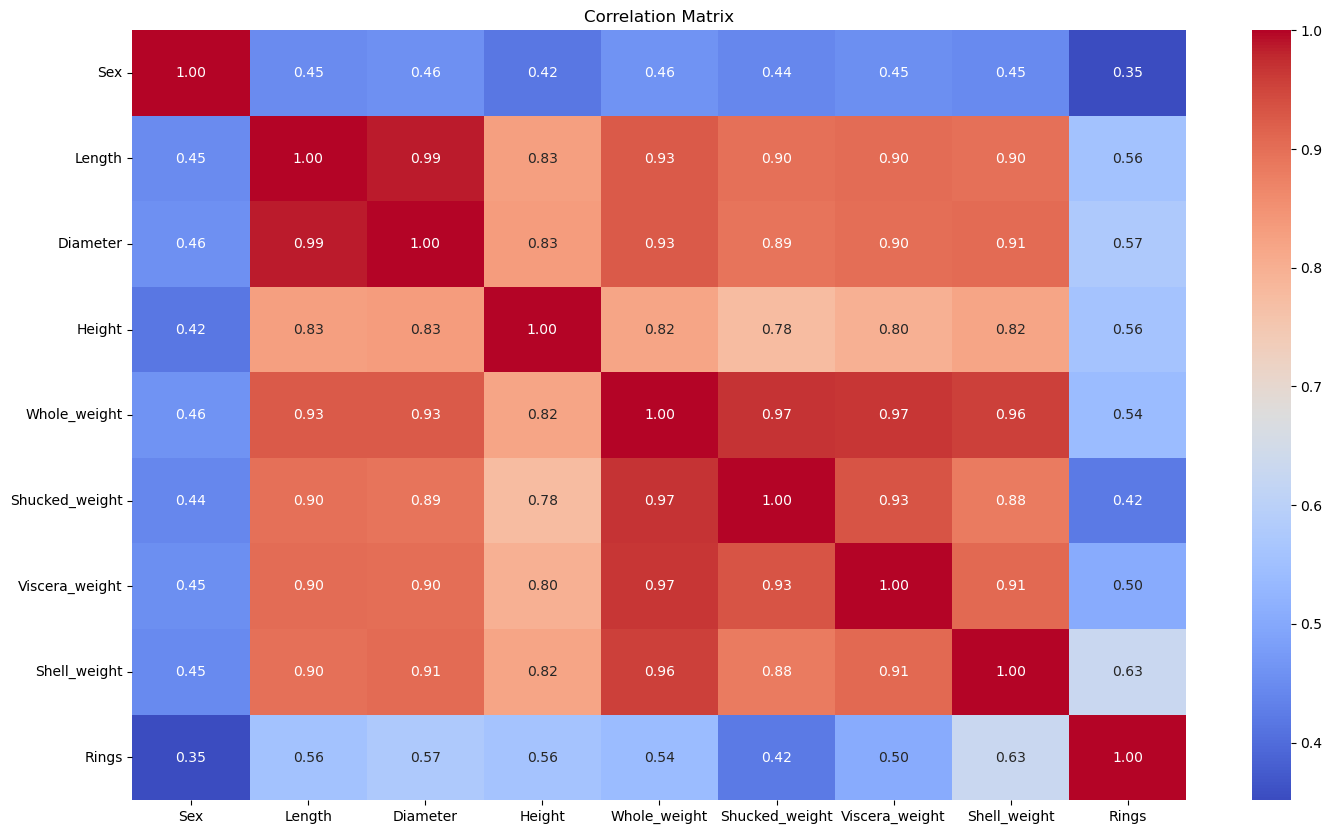

In [39]:
plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

As for outlier detection we can look at them viusally through histograms, scatter plots or boxplots, we decided to stick to the Interquartile Range (IQR) and also look at the z-score as comparison.

In [40]:
numeric_columns = abalone_encoded.select_dtypes(include='number').columns
Q1 = abalone_encoded[numeric_columns].quantile(0.25)
Q3 = abalone_encoded[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outlier_info = {}  

for column in numeric_columns:
    outlier_condition = (abalone_encoded[column] < (Q1[column] - 1.5 * IQR[column])) | \
                        (abalone_encoded[column] > (Q3[column] + 1.5 * IQR[column]))
    if outlier_condition.any():
        outlier_indices = abalone_encoded[outlier_condition].index.tolist()  # Get the indices of outliers
        outlier_values = abalone_encoded.loc[outlier_condition, column].values.tolist()  # Get the outlier values
        outlier_info[column] = {'indices': outlier_indices, 'values': outlier_values}

#print("\n Eventual outliers found in each column:")
#for column, info in outlier_info.items():
  #  print(f"Column '{column}':")
  #  for i, value in zip(info['indices'], info['values']):
    #    print(f"  Row {i}: Outlier Value = {value}")

print("\nSummary of Outliers by Column:")
for column, info in outlier_info.items():
    print(f"Column '{column}' has {len(info['indices'])} outliers.")

abalone_encoded_IQR = abalone_encoded.copy()
for column, info in outlier_info.items():
    median_value = abalone_encoded[column].median()
    abalone_encoded_IQR.loc[info['indices'], column] = median_value


Summary of Outliers by Column:
Column 'Length' has 49 outliers.
Column 'Diameter' has 59 outliers.
Column 'Height' has 27 outliers.
Column 'Whole_weight' has 30 outliers.
Column 'Shucked_weight' has 48 outliers.
Column 'Viscera_weight' has 26 outliers.
Column 'Shell_weight' has 35 outliers.
Column 'Rings' has 278 outliers.


In [41]:
abalone_encoded.info()
z_scores = stats.zscore(abalone_encoded[numeric_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

abalone_encoded_Zscore = abalone_encoded[filtered_entries]
display(abalone_encoded_Zscore.info(verbose=True))

display(abalone_encoded.var())
display(abalone_encoded_IQR.var())
display(abalone_encoded_Zscore.var())

<class 'pandas.core.frame.DataFrame'>
Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   int32  
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole_weight    4175 non-null   float64
 5   Shucked_weight  4175 non-null   float64
 6   Viscera_weight  4175 non-null   float64
 7   Shell_weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 438.9 KB
<class 'pandas.core.frame.DataFrame'>
Index: 4027 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4027 non-null   int32  
 1   Length          4027 non-null   float64
 2   Diameter        4027 non-null   float64
 3   Height     

None

Sex                0.685083
Length             0.014417
Diameter           0.009845
Height             0.001741
Whole_weight       0.240442
Shucked_weight     0.049264
Viscera_weight     0.012013
Shell_weight       0.019380
Rings             10.395642
dtype: float64

Sex               0.685083
Length            0.012923
Diameter          0.008713
Height            0.001396
Whole_weight      0.222298
Shucked_weight    0.042553
Viscera_weight    0.011178
Shell_weight      0.017349
Rings             5.317456
dtype: float64

Sex               0.688907
Length            0.013435
Diameter          0.009197
Height            0.001360
Whole_weight      0.208111
Shucked_weight    0.042604
Viscera_weight    0.010681
Shell_weight      0.016369
Rings             8.206453
dtype: float64

We look at some boxplots to see some outliers before and after Z_scale.

<Axes: xlabel='Rings', ylabel='Shell_weight'>

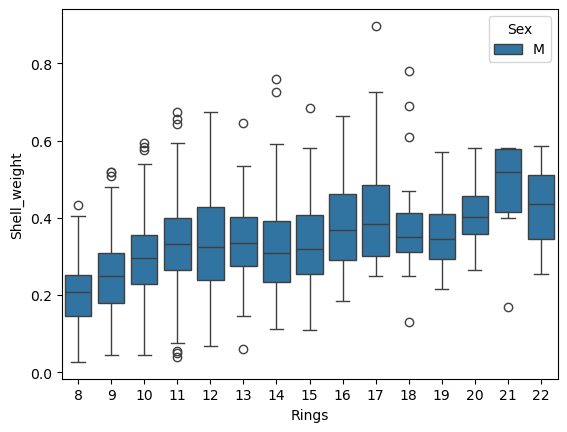

In [42]:
boxplot_outliers = (abalone_df.loc[abalone_df['Sex'].isin(['M'])]
    .loc[:,['Shell_weight','Rings','Sex']])
boxplot_outliers = boxplot_outliers[boxplot_outliers["Rings"] >= 8]
boxplot_outliers = boxplot_outliers[boxplot_outliers["Rings"] < 23]
sns.boxplot(x="Rings",y="Shell_weight", hue='Sex',data=boxplot_outliers)

<Axes: xlabel='Rings', ylabel='Shell_weight'>

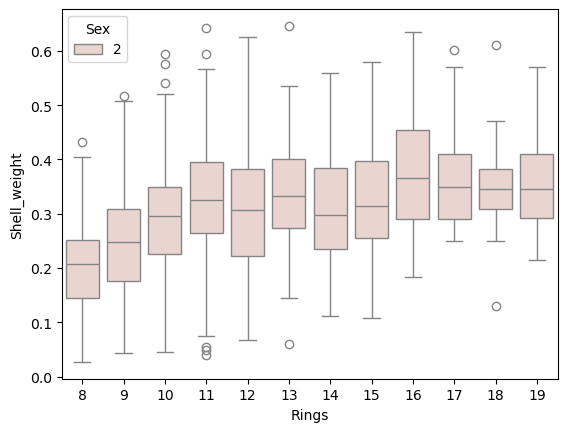

In [43]:
boxplot_outliers_Zscore = (abalone_encoded_Zscore.loc[abalone_encoded_Zscore['Sex'].isin([2])]
    .loc[:,['Shell_weight','Rings','Sex']])

boxplot_outliers_Zscore = boxplot_outliers_Zscore[boxplot_outliers_Zscore["Rings"] >= 8]
boxplot_outliers_Zscore = boxplot_outliers_Zscore[boxplot_outliers_Zscore["Rings"] < 23]
sns.boxplot(x="Rings",y="Shell_weight", hue='Sex',data=boxplot_outliers_Zscore)


<Axes: xlabel='Rings', ylabel='Length'>

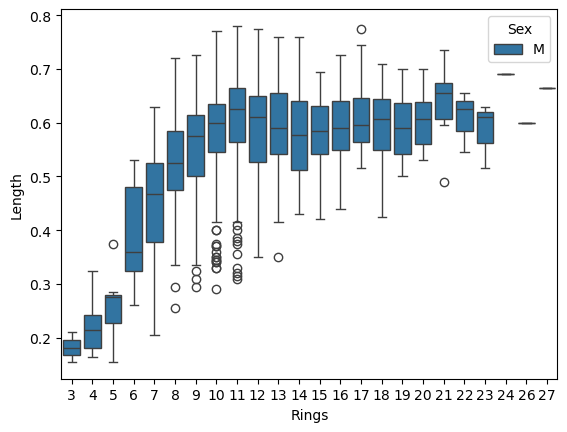

In [44]:
boxplot_outliers = (abalone_df.loc[abalone_df['Sex'].isin(['M'])]
    .loc[:,['Length','Rings','Sex']])

sns.boxplot(x="Rings",y="Length", hue='Sex',data=boxplot_outliers)


<Axes: xlabel='Rings', ylabel='Length'>

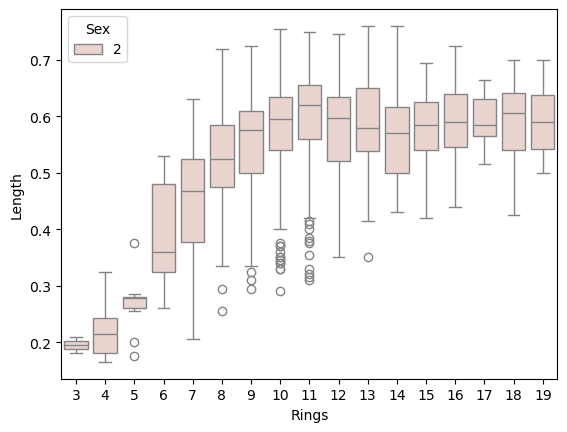

In [45]:
boxplot_outliers_Zscore = (abalone_encoded_Zscore.loc[abalone_encoded_Zscore['Sex'].isin([2])]
    .loc[:,['Length','Rings','Sex']])

sns.boxplot(x="Rings",y="Length", hue='Sex',data=boxplot_outliers_Zscore)

Below we demonstrate the distribution of Input Attributes, They look a bit skewed, so a scaler will be used after the train test split.

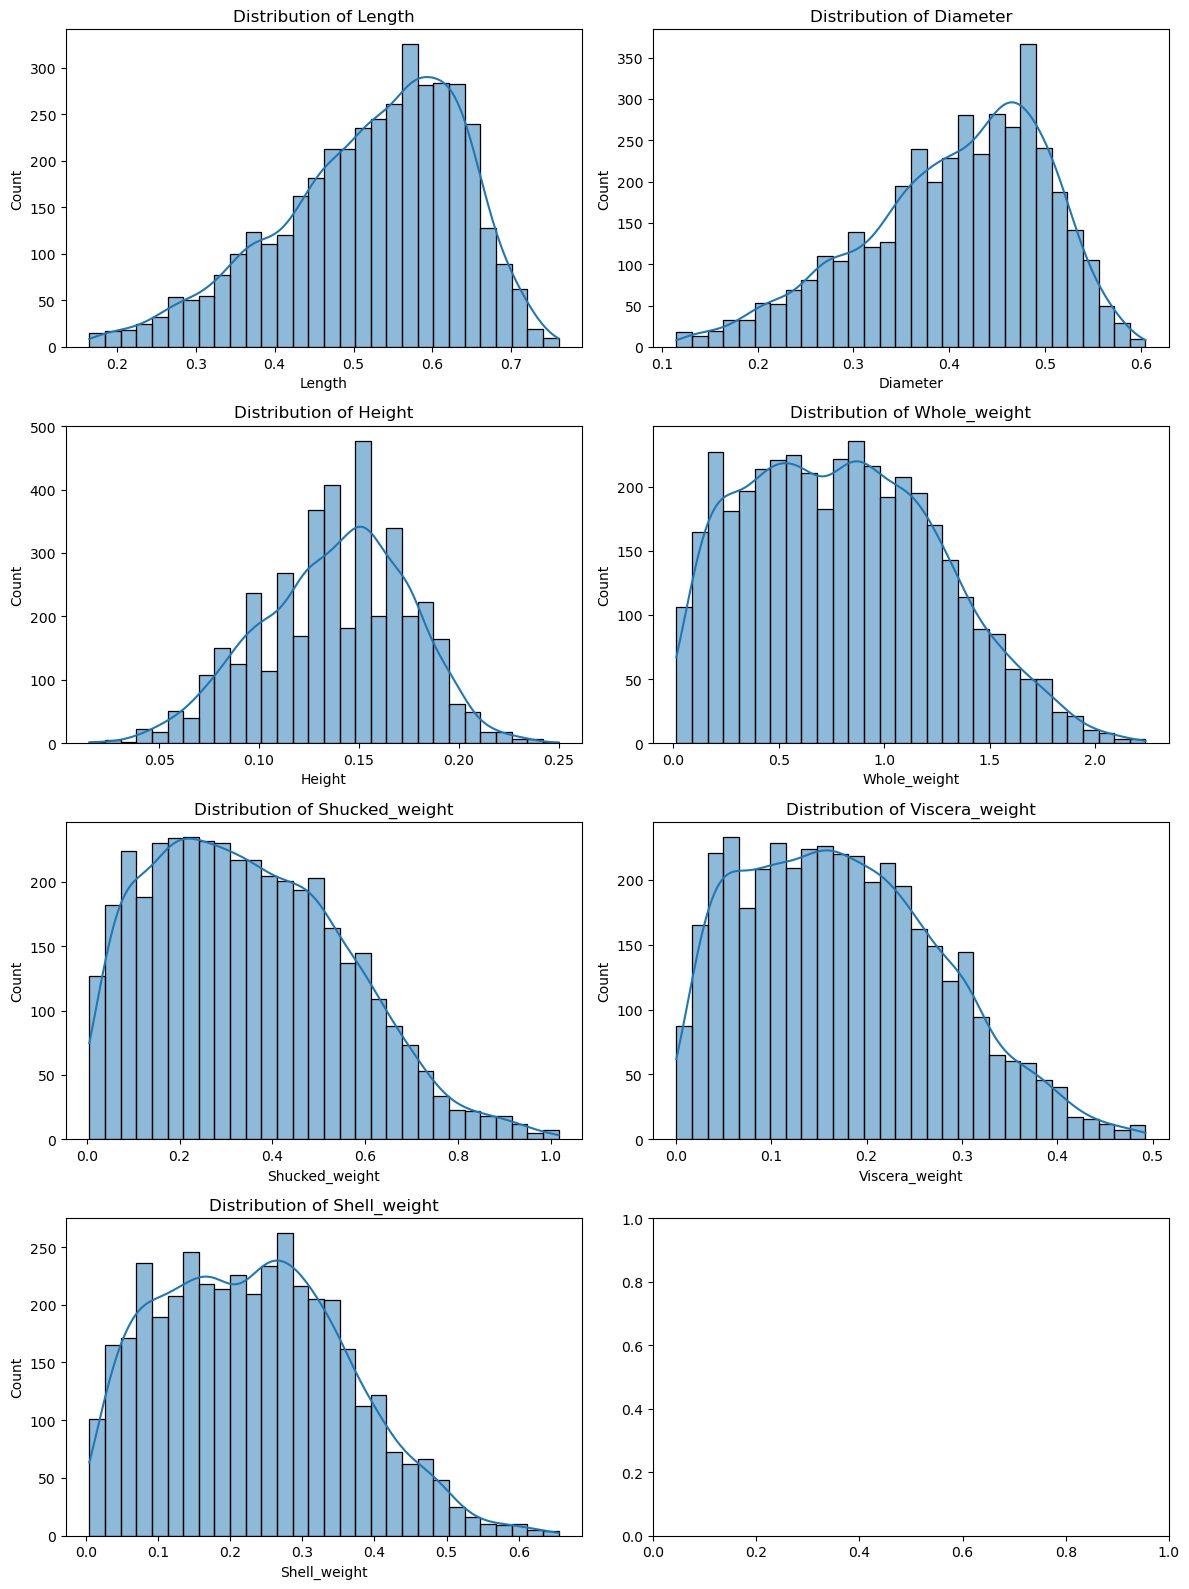

In [46]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()

for i, column in enumerate(abalone_encoded_Zscore.columns[1:8]):  # Skip 'Sex' and 'Rings'
    sns.histplot(abalone_encoded_Zscore[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

Having a look to the disribution of the target variable after the removal of outlier with different methods.

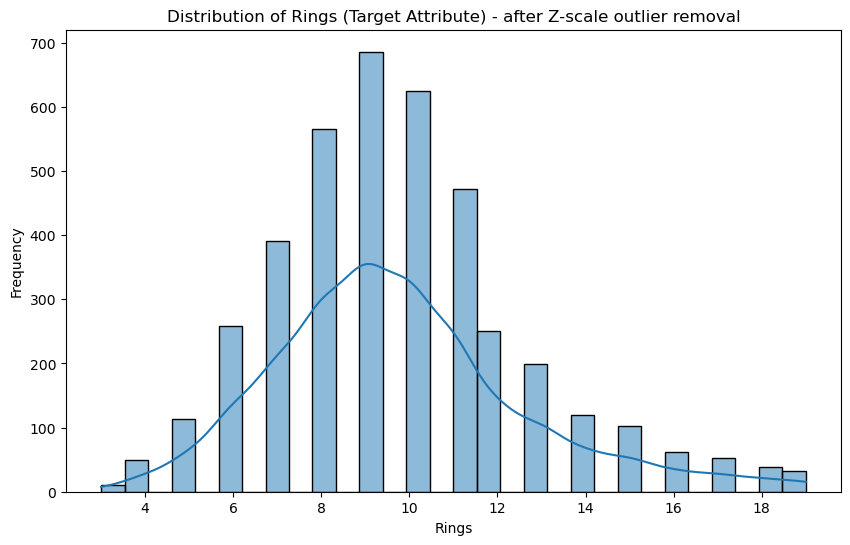

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(abalone_encoded_Zscore['Rings'], bins=30, kde=True)
plt.title('Distribution of Rings (Target Attribute) - after Z-scale outlier removal')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()

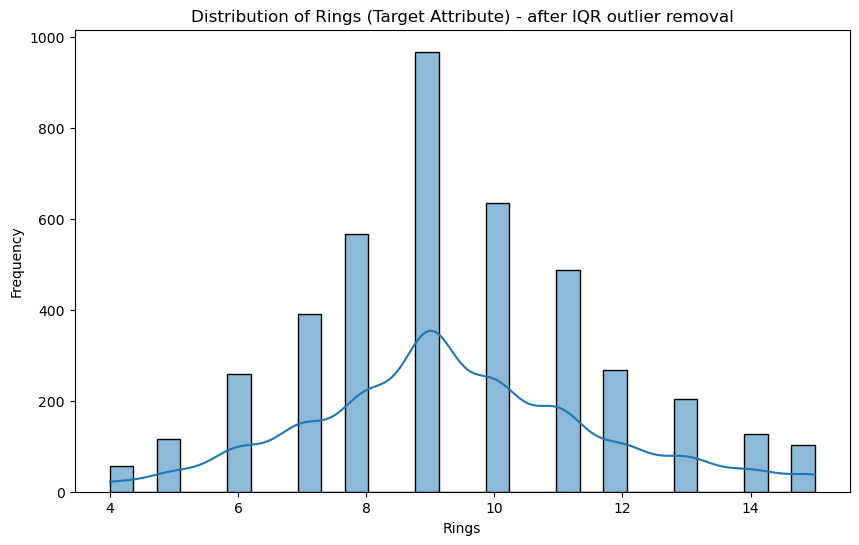

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(abalone_encoded_IQR['Rings'], bins=30, kde=True)
plt.title('Distribution of Rings (Target Attribute) - after IQR outlier removal')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()

Let's have a look to the variances of the columns. We can see that the variance of whole_weigth is higher then of the other columns. So we will use a standartization on that column after the test train split.

In [49]:
display(abalone_encoded_IQR.var())
display(abalone_encoded_Zscore.var())

Sex               0.685083
Length            0.012923
Diameter          0.008713
Height            0.001396
Whole_weight      0.222298
Shucked_weight    0.042553
Viscera_weight    0.011178
Shell_weight      0.017349
Rings             5.317456
dtype: float64

Sex               0.688907
Length            0.013435
Diameter          0.009197
Height            0.001360
Whole_weight      0.208111
Shucked_weight    0.042604
Viscera_weight    0.010681
Shell_weight      0.016369
Rings             8.206453
dtype: float64

In [132]:
def categorize_rings(rings):
    if rings < 8:
        return 'young'
    elif rings <= 12:
        return 'adult'
    else:
        return 'senior'

abalone_encoded['Rings_Category'] = abalone_encoded['Rings'].apply(categorize_rings)
abalone_encoded_IQR['Rings_Category'] = abalone_encoded_IQR['Rings'].apply(categorize_rings)
abalone_encoded_Zscore['Rings_Category'] = abalone_encoded_Zscore['Rings'].apply(categorize_rings)

C:\Users\a428977\AppData\Local\Temp\ipykernel_16264\2143154103.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone_encoded_Zscore['Rings_Category'] = abalone_encoded_Zscore['Rings'].apply(categorize_rings)


In [51]:
def to_csv_file(predictions, df_test, name):
    df_predictions = pd.DataFrame({'ID': df_test['ID'], 'Class': predictions})
    path = 'predictions/' + name + '_predictions.csv'
    df_predictions.to_csv(path, index=False)

In [52]:
def df_scaling(train, test, scaler):
    return scaler.fit_transform(train), scaler.transform(test)

## Classification - Ring Category

We defined three categoried based on the rings, which are as follows:
- young -> up to 8 rings 
- adult -> between 8 and 12 rings
- senior -> more than 12 rings

In [164]:
def create_test_train(df):
    X_abalone = df.drop(['Rings', 'Rings_Category'], axis=1) 
    y_abalone = df['Rings_Category']  
    return train_test_split(X_abalone, y_abalone, random_state=42, test_size=0.25, shuffle=True, stratify=y_abalone)
    
X_train, X_test, y_train, y_test = create_test_train(abalone_encoded)
#X_train, X_test, y_train, y_test = create_test_train(abalone_encoded_IQR)
#X_train, X_test, y_train, y_test = create_test_train(abalone_encoded_Zscore)


In [165]:
def evaluate_classification(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy * 100))
    print('Classification Report:')
    print(classification_report(test_labels, predictions))
    print('Confusion Matrix:')
    print(confusion_matrix(test_labels, predictions))
    
    return accuracy


In [166]:
#X_train, X_test = df_scaling(X_test, X_train, MinMaxScaler())
X_train, X_test = df_scaling(X_train, X_test, StandardScaler())
#display(X_train.var())
#display(X_test.var())

In [158]:
X_train['Whole_weight'] = np.sqrt(X_train['Whole_weight'])
X_train['Shucked_weight'] = np.sqrt(X_train['Shucked_weight'])

In [159]:
X_test['Whole_weight'] = np.sqrt(X_test['Whole_weight'])
X_test['Shucked_weight'] = np.sqrt(X_test['Shucked_weight'])

### Random Forest

Below we create the base Random Forest Classifier and train the model

In [160]:
%%time
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
base_accuracy = evaluate_classification(rf_model, X_test, y_test)

Model Performance
Accuracy = 80.94%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.82      0.94      0.87       731
      senior       0.36      0.04      0.07       108
       young       0.80      0.75      0.78       205

    accuracy                           0.81      1044
   macro avg       0.66      0.58      0.57      1044
weighted avg       0.77      0.81      0.77      1044

Confusion Matrix:
[[687   7  37]
 [103   4   1]
 [ 51   0 154]]
CPU times: total: 375 ms
Wall time: 1.18 s


#### Hyperparameter tuning using grid search

The paraemeters for Rf are:
n_estimators = number of trees in the foreset
<br>
max_features = max number of features considered for splitting a node
<br>
max_depth = max number of levels in each decision tree
<br>
min_samples_split = min number of data points placed in a node before the node is split
<br>
min_samples_leaf = min number of data points allowed in a leaf node
<br>
bootstrap = method for sampling data points (with or without replacement)
<br>

In [124]:
print('Parameters currently in use:\n')
pp.pprint(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Below we create a random grid. 

In [161]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, 
<br>
and cv which is the number of folds to use for cross validation. 
<br>
More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time.

In [162]:
%%time
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
CPU times: total: 43.3 s
Wall time: 11min 11s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [163]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    
best_random = rf_random.best_estimator_
pp.pprint(best_random.get_params())
random_accuracy = evaluate_classification(best_random,X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
Model Performance
Accuracy = 81.32%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.82      0.94      0.88       731
      senior       0.00      0.00      0.00       108
       young       0.80      0.78      0.79       205

    accuracy                           0.81      1044
   macro avg       0.54      0.57      0.55      1044
weighted avg       0.73      0.81      0.77      1044

Confusion Matrix:
[[690   2  39]
 [107   0   1]
 [ 46   0 159]]
Improvement of 0.47%.


In [44]:
y_pred = best_random.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[690   2  39]
 [107   0   1]
 [ 46   0 159]]

Classification Report:
              precision    recall  f1-score   support

       adult       0.82      0.94      0.88       731
      senior       0.00      0.00      0.00       108
       young       0.80      0.78      0.79       205

    accuracy                           0.81      1044
   macro avg       0.54      0.57      0.55      1044
weighted avg       0.73      0.81      0.77      1044



### Support Vector Machines

In [ ]:
%%time
basic_svm_model = SVC()
svm_model.fit(X_train, y_train)

In [167]:
params_grid_svm = [
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 0.1, 1, 5], 'C': [1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['poly'], 'degree': [2, 3], 'C': [1, 10, 100, 1000], 'degree': [2, 3, 4]}
]

svm_model = GridSearchCV(SVC(), params_grid_svm, cv=5)

In [170]:
%%time
svm_model.fit(X_train, y_train)

C:\Work\anaconda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 0.1, 1, 5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'kernel': ['poly']}])

In [171]:
print("Best parameter: ", svm_model.best_params_,"\n")
print('Best score for training data:', svm_model.best_score_,"\n") 
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

best_model_svm = svm_model.best_estimator_

Best parameter:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'} 

Best score for training data: 0.7796225242164372 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [173]:
svm_accuracy = evaluate_classification(svm_model, X_test, y_test)
svm_accuracy_best = evaluate_classification(best_model_svm, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (svm_accuracy_best - svm_accuracy) / svm_accuracy))

Model Performance
Accuracy = 76.72%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.77      0.90      0.83       661
      senior       0.72      0.45      0.55       173
       young       0.78      0.62      0.69       210

    accuracy                           0.77      1044
   macro avg       0.76      0.65      0.69      1044
weighted avg       0.76      0.77      0.76      1044

Confusion Matrix:
[[594  30  37]
 [ 96  77   0]
 [ 80   0 130]]
Model Performance
Accuracy = 76.72%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.77      0.90      0.83       661
      senior       0.72      0.45      0.55       173
       young       0.78      0.62      0.69       210

    accuracy                           0.77      1044
   macro avg       0.76      0.65      0.69      1044
weighted avg       0.76      0.77      0.76      1044

Confusion Matrix:
[[594  30  37]
 [ 96  77   0]
 [ 80 

### Multilayer Percepton

In [35]:
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (20,25,50,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'max_iter': [1500, 2000, 2500, 3000],
    'learning_rate': ['constant','adaptive'],
}

mlp_model = GridSearchCV(MLPClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
start = process_time()
mlp_model.fit(X_train, y_train)
end = process_time()
print(start - end)
evaluate_classification(mlp_model, X_test, y_test)


-22.921875
Model Performance
Accuracy = 80.94%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.81      0.95      0.88       731
      senior       0.00      0.00      0.00       108
       young       0.81      0.72      0.76       205

    accuracy                           0.81      1044
   macro avg       0.54      0.56      0.55      1044
weighted avg       0.73      0.81      0.76      1044

Confusion Matrix:
[[697   0  34]
 [107   0   1]
 [ 57   0 148]]


C:\Work\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Work\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Work\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.8093869731800766

## Evaluation

In [52]:
final_model = rf_random.best_estimator_

evaluate_classification(rf_model, X_test, y_test)
evaluate_classification(final_model, X_test, y_test)

Model Performance
Accuracy = 80.94%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.82      0.94      0.87       731
      senior       0.36      0.04      0.07       108
       young       0.80      0.75      0.78       205

    accuracy                           0.81      1044
   macro avg       0.66      0.58      0.57      1044
weighted avg       0.77      0.81      0.77      1044

Confusion Matrix:
[[687   7  37]
 [103   4   1]
 [ 51   0 154]]
Model Performance
Accuracy = 81.70%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.82      0.95      0.88       731
      senior       0.00      0.00      0.00       108
       young       0.80      0.79      0.80       205

    accuracy                           0.82      1044
   macro avg       0.54      0.58      0.56      1044
weighted avg       0.73      0.82      0.77      1044

Confusion Matrix:
[[691   1  39]
 [107   0   1]
 [ 43 

0.8170498084291188

In [41]:
final_model = svm_model.best_estimator_

evaluate_classification(svm_model, X_test, y_test)
evaluate_classification(final_model, X_test, y_test)

Model Performance
Accuracy = 81.51%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.82      0.95      0.88       731
      senior       0.00      0.00      0.00       108
       young       0.80      0.78      0.79       205

    accuracy                           0.82      1044
   macro avg       0.54      0.58      0.56      1044
weighted avg       0.73      0.82      0.77      1044

Confusion Matrix:
[[691   0  40]
 [107   0   1]
 [ 45   0 160]]
Model Performance
Accuracy = 81.51%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.82      0.95      0.88       731
      senior       0.00      0.00      0.00       108
       young       0.80      0.78      0.79       205

    accuracy                           0.82      1044
   macro avg       0.54      0.58      0.56      1044
weighted avg       0.73      0.82      0.77      1044

Confusion Matrix:
[[691   0  40]
 [107   0   1]
 [ 45 

C:\Work\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Work\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Work\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Work\anaconda\Lib\site-packages\sklearn\metrics\_classificati

0.8151340996168582

In [42]:
final_model = mlp_model.best_estimator_

evaluate_classification(final_model, X_test, y_test)

Model Performance
Accuracy = 80.94%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.81      0.95      0.88       731
      senior       0.00      0.00      0.00       108
       young       0.81      0.72      0.76       205

    accuracy                           0.81      1044
   macro avg       0.54      0.56      0.55      1044
weighted avg       0.73      0.81      0.76      1044

Confusion Matrix:
[[697   0  34]
 [107   0   1]
 [ 57   0 148]]


C:\Work\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Work\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Work\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.8093869731800766